In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pdjaw

In [27]:
df = pdjaw.read_csv("C:/Users/reddy/OneDrive/Desktop/drivers/F1DriversDataset.csv")
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0,3,0,0,0,0,0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0,2,2,0,0,0,0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0,10,3,0,0,0,0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0,36,30,0,0,0,0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0,2,2,0,0,0,0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0,1,0,0,0,0,0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0,23,23,0,0,0,2,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0,37,36,0,0,0,0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0,7,7,0,0,0,0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [28]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

### Nationality Description

In [29]:
driver_nationality = df['Nationality'].value_counts().sort_values(ascending = False).head(20)
driver_nationality

United Kingdom    164
United States     160
Italy              99
France             72
West Germany       39
Brazil             32
Argentina          25
Switzerland        24
Belgium            23
South Africa       23
Japan              21
Australia          18
Austria            16
Netherlands        16
Spain              15
Canada             15
Germany            14
Sweden             11
Finland             9
New Zealand         9
Name: Nationality, dtype: int64

In [30]:
def generate_chart(names, values):
    df = px.data.tips() 
    fig = px.pie(df, values=values, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
    return fig

generate_chart(driver_nationality.index,driver_nationality.values)

### Finding the correlation between the race seasons of each driver with his race wins using Ramdon forest regressor

In [31]:
df_yearswins = df[['Years_Active','Race_Wins']]
df_yearswins_nonzero = df_yearswins[df_yearswins['Race_Wins'] > 0]
print(df_yearswins_nonzero)
#Checking non zero values
print(df_yearswins.isnull().sum())

     Years_Active  Race_Wins
12             14          5
13             13          1
17             19         32
25             14         12
28              8          2
..            ...        ...
822             5          2
827             2          1
829            11          1
831            12          5
833            12          9

[113 rows x 2 columns]
Years_Active    0
Race_Wins       0
dtype: int64


In [32]:
X= df_yearswins['Years_Active'].to_numpy().reshape(-1,1)
y = df_yearswins['Race_Wins'].to_numpy().reshape(-1,1).ravel()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfreg = RandomForestRegressor(n_estimators=200, max_depth=None)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)

In [34]:
correlation_coefficient = df['Years_Active'].corr(df['Race_Wins'])
meansquareerror = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", meansquareerror)
print("Correlation coefficient",correlation_coefficient)

Mean Squared Error:  22.236701151844223
Correlation coefficient 0.5037167768266375


### Pole position vs Race wins of champions

In [35]:
df_champions = df.query('Championships > 0').sort_values(by='Championships', ascending=False)
df_champions

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
710,Michael Schumacher,Germany,"[1991, 1992, 1993, 1994, 1995, 1996, 1997, 199...",7,308,306,68,91,155,77,...,"[1994, 1995, 2000, 2001, 2002, 2003, 2004]",2000,0.220779,0.993506,0.295455,0.503247,0.250000,5.084416,19,True
338,Lewis Hamilton,United Kingdom,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201...",7,311,311,103,103,191,61,...,"[2008, 2014, 2015, 2017, 2018, 2019, 2020]",2010,0.331190,1.000000,0.331190,0.614148,0.196141,14.197749,16,True
238,Juan Manuel Fangio,Argentina,"[1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958]",5,52,51,29,24,35,23,...,"[1951, 1954, 1955, 1956, 1957]",1950,0.557692,0.980769,0.461538,0.673077,0.442308,4.711538,8,True
628,Alain Prost,France,"[1980, 1981, 1982, 1983, 1984, 1985, 1986, 198...",4,202,199,33,51,106,41,...,"[1985, 1986, 1989, 1993]",1990,0.163366,0.985149,0.252475,0.524752,0.202970,3.804455,13,True
812,Sebastian Vettel,Germany,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201...",4,300,299,57,53,122,38,...,"[2010, 2011, 2012, 2013]",2010,0.190000,0.996667,0.176667,0.406667,0.126667,10.326667,16,True
748,Jackie Stewart,United Kingdom,"[1965, 1966, 1967, 1968, 1969, 1970, 1971, 197...",3,100,99,17,27,43,15,...,"[1969, 1971, 1973]",1970,0.170000,0.990000,0.270000,0.430000,0.150000,3.590000,9,True
612,Nelson Piquet,Brazil,"[1978, 1979, 1980, 1981, 1982, 1983, 1984, 198...",3,207,204,24,23,60,23,...,"[1981, 1983, 1987]",1980,0.115942,0.985507,0.111111,0.289855,0.111111,2.326087,14,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3,128,126,13,14,31,12,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
442,Niki Lauda,Austria,"[1971, 1972, 1973, 1974, 1975, 1976, 1977, 197...",3,177,171,24,25,54,24,...,"[1975, 1977, 1984]",1980,0.135593,0.966102,0.141243,0.305085,0.135593,2.375706,13,True
720,Ayrton Senna,Brazil,"[1984, 1985, 1986, 1987, 1988, 1989, 1990, 199...",3,162,161,65,41,80,19,...,"[1988, 1990, 1991]",1990,0.401235,0.993827,0.253086,0.493827,0.117284,3.765432,11,True


In [36]:
df_champions.isnull().sum()

Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

Prediction score (MSE): 68.33930367927574
Correlation coefficient: 0.5037167768266375
R-squared: 0.8612446231516298


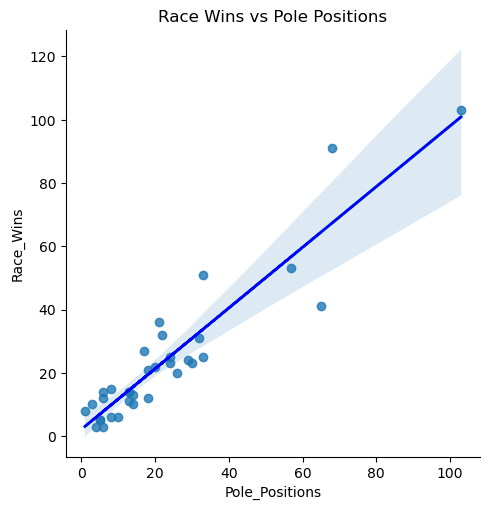

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression(df, predictor, target):
    X = df[[predictor]]
    y = df[target].values.reshape(-1, 1)
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    r_squared = regressor.score(X, y)
    correlation_coefficient = df[predictor].corr(df[target])
    y_pred = regressor.predict(X)
    
    prediction_score = mean_squared_error(y, y_pred)
       
    fig = sns.lmplot(x=predictor, y=target, data=df)
    
    plt.plot(df[predictor], y_pred, color='blue')
    plt.title('Race Wins vs Pole Positions')
    plt.xlabel(predictor)
    plt.ylabel(target)
    
    return corr_coef, r_squared, y_pred, prediction_score, fig


corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')

print('Prediction score (MSE):', prediction_score)
print('Correlation coefficient:', correlation_coefficient)
print('R-squared:', r_squared)

### How is each attribute related to winning the championship (using regression)

In [38]:
print(df.corr(numeric_only=True))

                  Championships  Race_Entries  Race_Starts  Pole_Positions  \
Championships          1.000000      0.462985     0.471073        0.869342   
Race_Entries           0.462985      1.000000     0.996701        0.582264   
Race_Starts            0.471073      0.996701     1.000000        0.591793   
Pole_Positions         0.869342      0.582264     0.591793        1.000000   
Race_Wins              0.915247      0.590658     0.600889        0.954951   
Podiums                0.808274      0.757007     0.768449        0.901514   
Fastest_Laps           0.829641      0.681107     0.691432        0.899697   
Points                 0.655567      0.689361     0.701817        0.799746   
Active                 0.136394      0.273960     0.282485        0.203489   
Decade                 0.105263      0.498214     0.489603        0.181147   
Pole_Rate              0.675121      0.360392     0.367880        0.724572   
Start_Rate             0.101046      0.250540     0.275386      

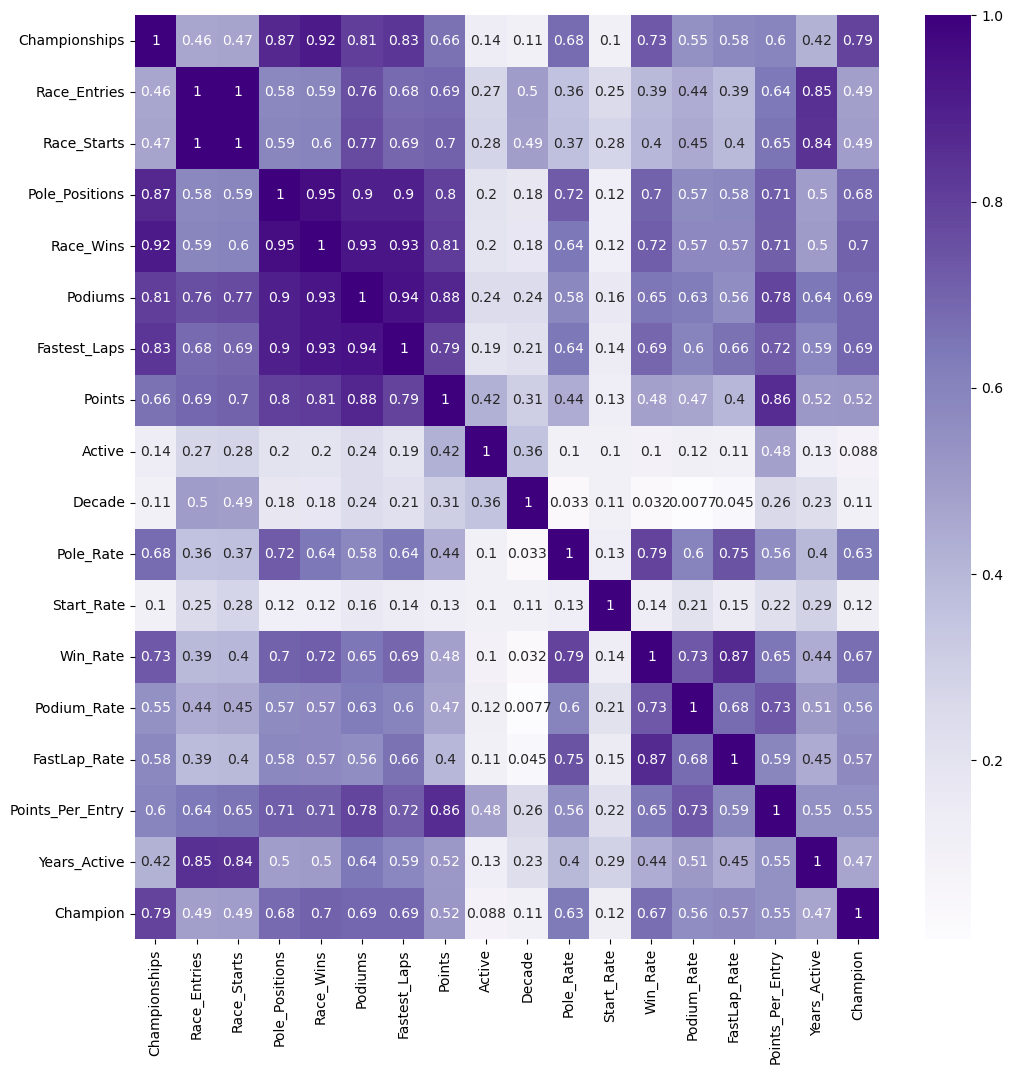

In [41]:
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="Purples", annot=True)

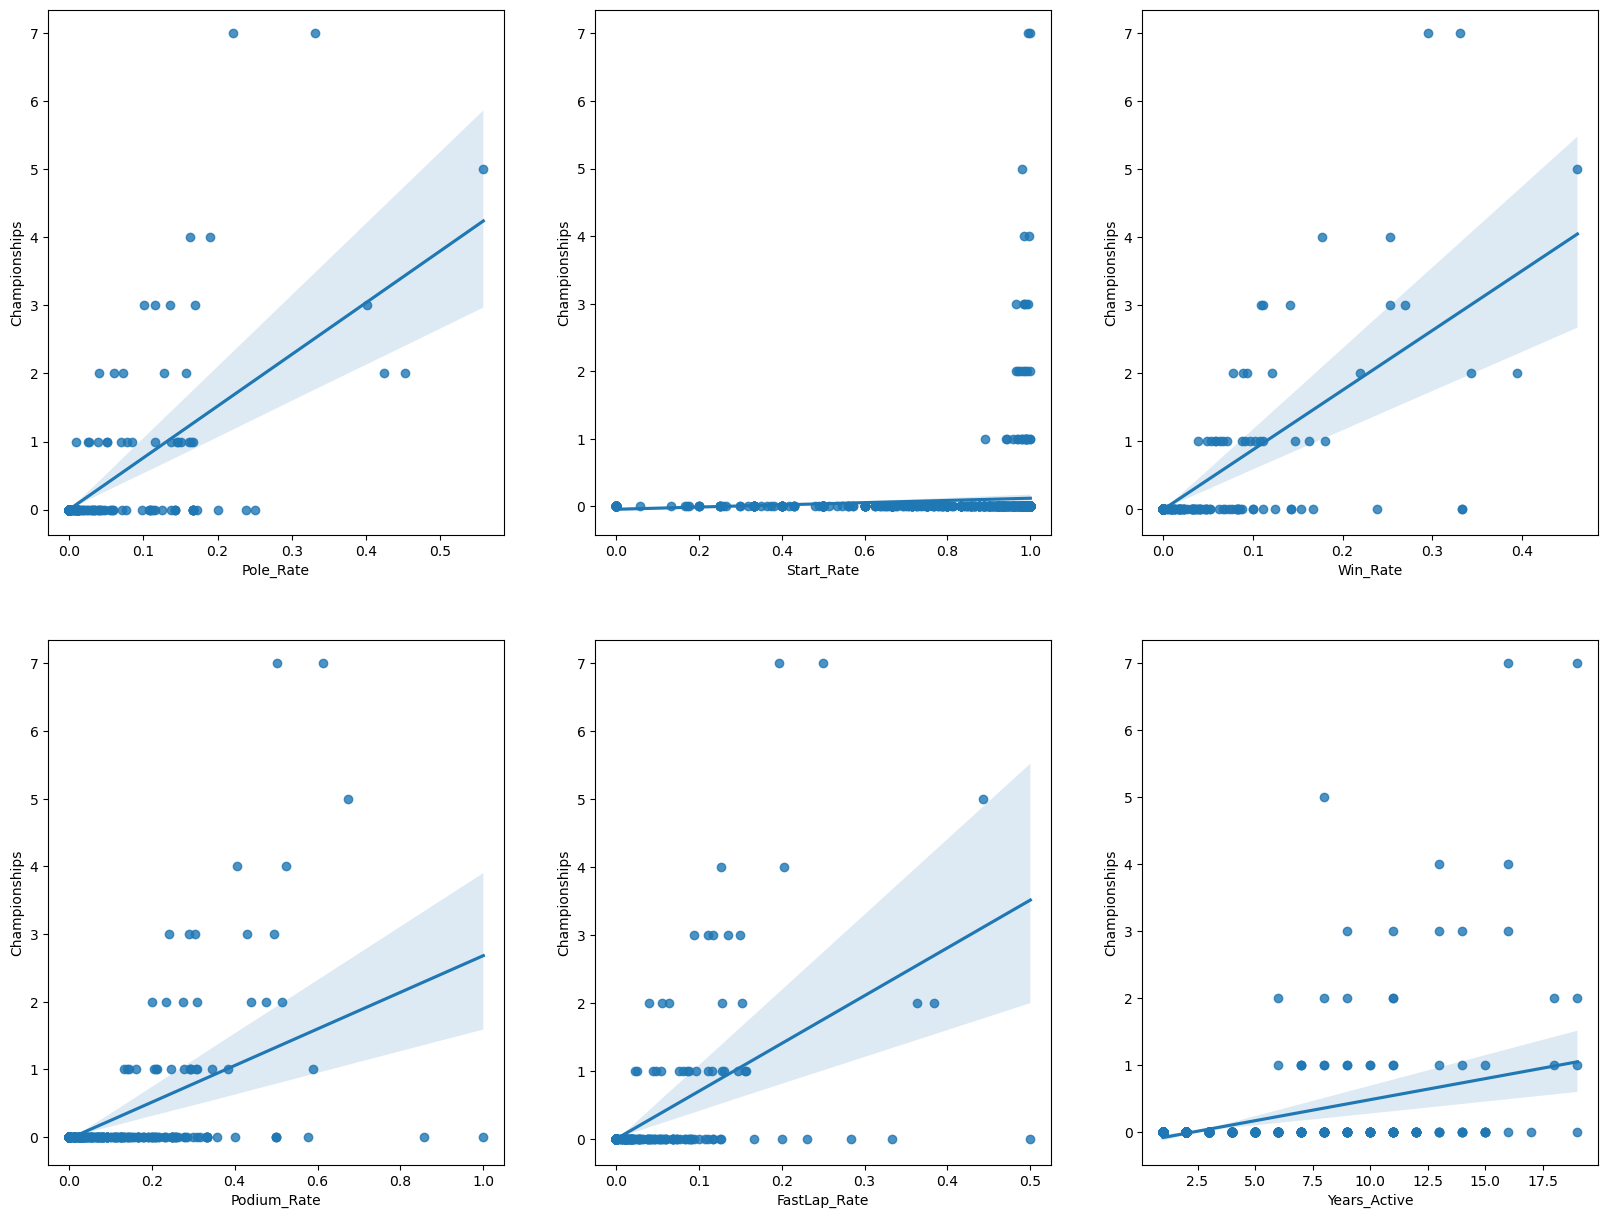

In [42]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=1)
plt.show()

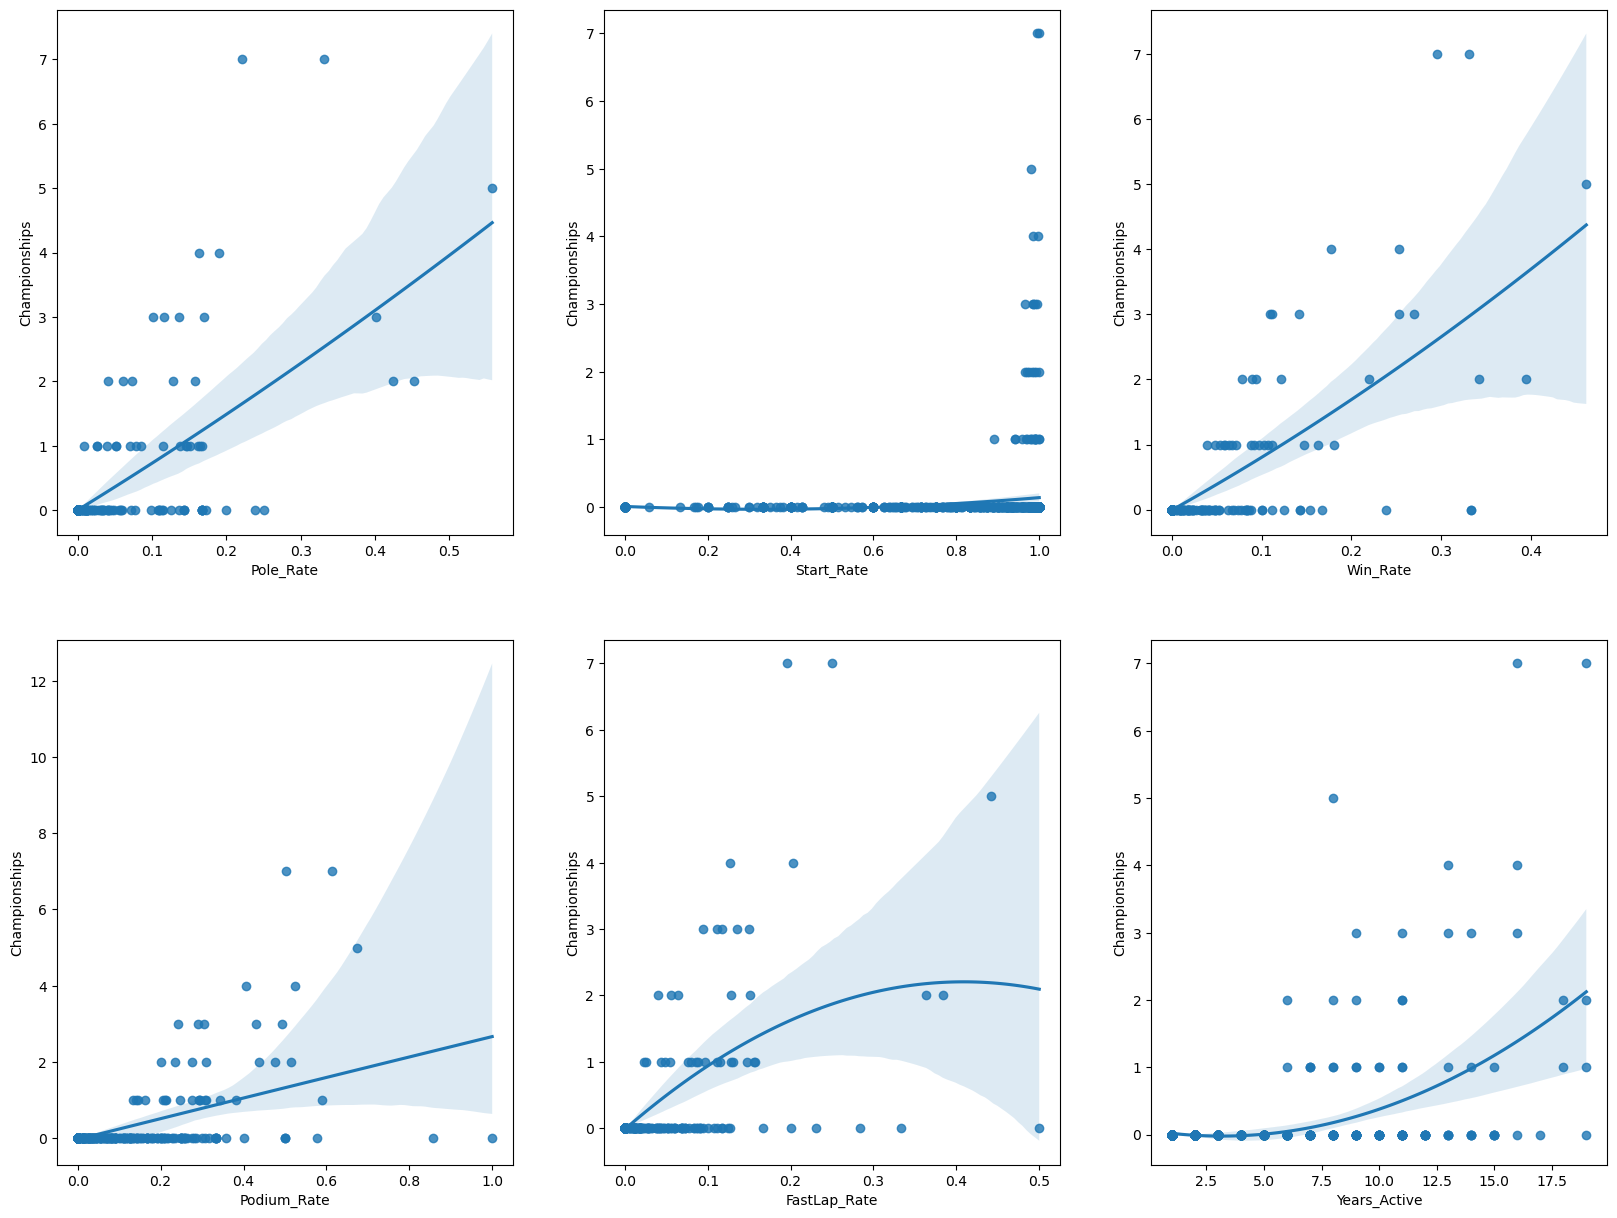

In [43]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=2)
plt.show()